## Used Car Prices Prediction

The aim of this project is to predict the used Car Prices. We will be using the Cardekho Dataset which is a research based Dataset on Used Cars still running on Indian Roads plus the cost and features with which the cars were sold.We are going to analyze and try to predict car prices using this dataset .

A used car, a pre-owned vehicle, or a secondhand car, is a vehicle that has previously had one or more retail owners. <br>
The price of a used car depends on various factors like age , mileage , engine , condition , features , etc. We will be looking through some of those and try to determine the car prices.

### Importing Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score

### Using Kaggle API to import Dataset

In [2]:
! kaggle datasets download -d nehalbirla/vehicle-dataset-from-cardekho

vehicle-dataset-from-cardekho.zip: Skipping, found more recently modified local copy (use --force to force download)


### Data Preprocessing

In [3]:
df = pd.read_csv('Car details v3.csv')

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
df.shape

(8128, 13)

In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

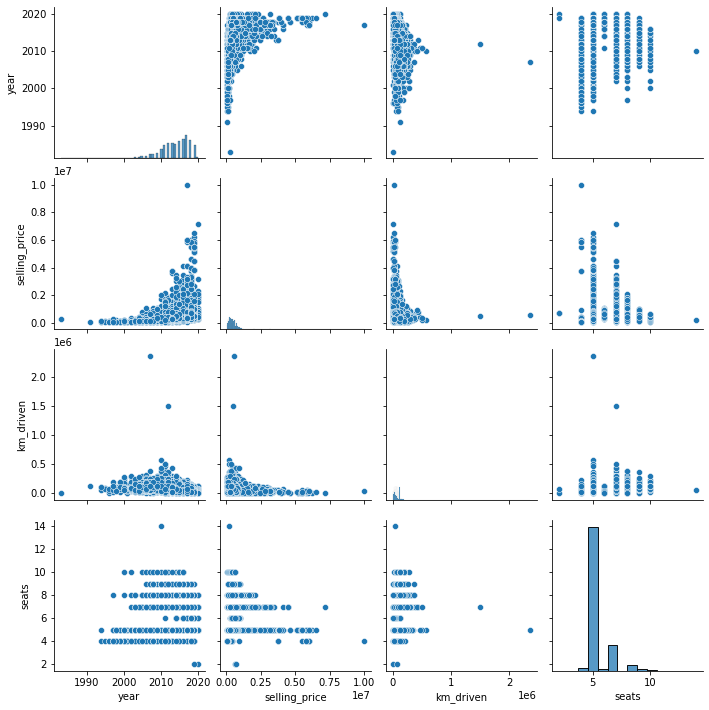

In [10]:
sns.pairplot(df)

In [11]:
all_cols = df.columns

In [12]:
numerical_cols = df._get_numeric_data().columns.to_list()

In [13]:
categorical_cols = list(set(all_cols)-set(numerical_cols))

In [14]:
numerical_cols,categorical_cols

(['year', 'selling_price', 'km_driven', 'seats'],
 ['seller_type',
  'owner',
  'name',
  'engine',
  'transmission',
  'torque',
  'fuel',
  'max_power',
  'mileage'])

In [15]:
[df[x].unique() for x in categorical_cols[1:]]

[array(['First Owner', 'Second Owner', 'Third Owner',
        'Fourth & Above Owner', 'Test Drive Car'], dtype=object),
 array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
        'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
        'Ford Freestyle Titanium Plus Diesel BSIV',
        'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object),
 array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
        '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
        nan, '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
        '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
        '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
        '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
        '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
        '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
        '2362 CC', '1493 CC', '1599 C

#### Dropping Name column since it isnt useful for our model

In [16]:
df.drop(['name'] , inplace=True , axis=1)

In [17]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


#### Finding Age of Car , by subtracting current year with car manufacture year

In [18]:
df['car_age'] = 2021 - df.year

In [19]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_age
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,7
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,7
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,15
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,11
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,14


In [20]:
df.drop(['year'],inplace=True,axis=1)

In [21]:
df.seats.unique

<bound method Series.unique of 0       5.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
8123    5.0
8124    5.0
8125    5.0
8126    5.0
8127    5.0
Name: seats, Length: 8128, dtype: float64>

In [22]:
df.drop(['seats'],inplace=True,axis=1)

In [23]:
df.corr()

,selling_price,km_driven,car_age
selling_price,1.000000,-0.225534,-0.414092
km_driven,-0.225534,1.000000,0.418006
car_age,-0.414092,0.418006,1.000000


<AxesSubplot:>

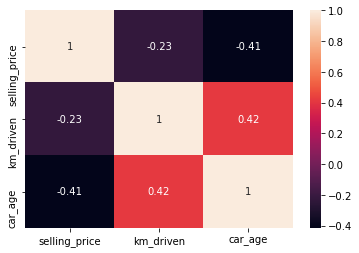

In [24]:
sns.heatmap(df.corr(),annot=True)

In [25]:
y = df.pop('selling_price')
x = df

In [26]:
y.head()

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

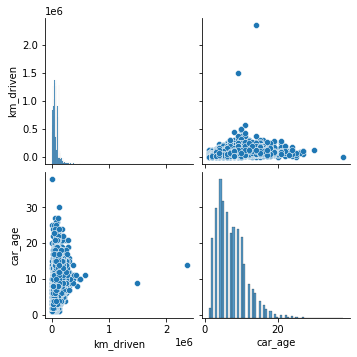

In [27]:
sns.pairplot(df)

#### Creating Dummies to convert categorical data into numerical

In [28]:
gg=pd.get_dummies(df)

In [29]:
gg.head()

,km_driven,car_age,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,...,torque_96.1Nm@ 3000rpm,torque_96Nm@ 2500rpm,torque_96Nm@ 3000rpm,torque_96Nm@ 3500rpm,torque_98Nm@ 1600-3000rpm,torque_99.04Nm@ 4500rpm,torque_99.07Nm@ 4500rpm,torque_99.1Nm@ 4500rpm,torque_99.8Nm@ 2700rpm,torque_99Nm@ 4500rpm
0,145500,7,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,7,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,140000,15,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,127000,11,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120000,14,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
x = gg

In [32]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=36)

### Decision Tree Regressor Model

In [34]:
dt = DecisionTreeRegressor()

In [35]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [36]:
dt.score(x_train,y_train)

0.9995974350554304

### Random Forest Regressor Model

In [46]:
rf = RandomForestRegressor(n_estimators=100, random_state=0, verbose=1,n_jobs=-1)
rf.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished


RandomForestRegressor(n_jobs=-1, random_state=0, verbose=1)

In [48]:
rf.score(x_train,y_train)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9892830337945874

### Linear Regression Model

In [52]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [59]:
lm.score(x_train,y_train)

0.9817099877331161

In [61]:
y_predict_dt = dt.predict(x_test)
y_predict_rf = rf.predict(x_test)
y_predict_lm = lm.predict(x_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [67]:
dt_rmse=np.sqrt(mean_squared_error(y_test,y_predict_dt))
rf_rmse=np.sqrt(mean_squared_error(y_test,y_predict_rf))
lr_rmse=np.sqrt(mean_squared_error(y_test,y_predict_lm))

## Conclusion


### Printing Cumulative Result , comparing the models based on their RMSE

In [68]:
model_ev = pd.DataFrame({'Model': ['Linear Regression','Decision Tree Regression','Random Forest Regression'], 
                         'RMSE': [lr_rmse,dt_rmse, rf_rmse]})
model_ev

,Model,RMSE
0,Linear Regression,9.173600e+09
1,Decision Tree Regression,2.056130e+05
2,Random Forest Regression,1.516435e+05


#### We can see that of all the models , Random Forest Regressor gives the minimum Root Mean Squared Error , plus their training Accuracy is also good.

#### So we will see the testing accuracy using Random Forest Regessor

In [69]:
rf.score(x_test,y_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9661172349089011

### Hence , we are getting an Accuracy of 96.6 % using Random Forest Regressor Model